In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [8]:
data = pd.read_csv('banknote.csv')

In [7]:
data

,V1,V2
0,3.62160,8.66610
1,4.54590,8.16740
2,3.86600,-2.63830
3,3.45660,9.52280
4,0.32924,-4.45520
...,...,...
1367,0.40614,1.34920
1368,-1.38870,-4.87730
1369,-3.75030,-13.45860
1370,-3.56370,-8.38270


In [9]:
x1 = x ['V1']
y = x ['V2']

In [10]:
x = data.copy()

## Normalising data

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x[['V1', 'V2']] = scaler.fit_transform(x[['V1', 'V2']])

## using elbow method to find best value of K

In [8]:
wcss=[]


for i in range(1,25):

    kmeans = KMeans(i,n_init=10)
 
    kmeans.fit(x)
    
    wcss_iter = kmeans.inertia_
  
    wcss.append(wcss_iter)


wcss

[123.7403662945973,
 71.2615832937764,
 50.13875109473236,
 34.890915919718026,
 25.54031805370898,
 20.8283453017102,
 17.34566922490447,
 14.684374845306547,
 12.882352660799683,
 11.322881233506411,
 10.004804791612964,
 9.146798727273024,
 8.334781659589567,
 7.517234558791666,
 6.865369370173891,
 6.286179388831743,
 5.8302412313064735,
 5.261451807108954,
 4.9706856278232285,
 4.68279162308958,
 4.423656294842509,
 4.182439976777803,
 3.9903637677685317,
 3.772108912200335]

Text(0, 0.5, 'WCSS')

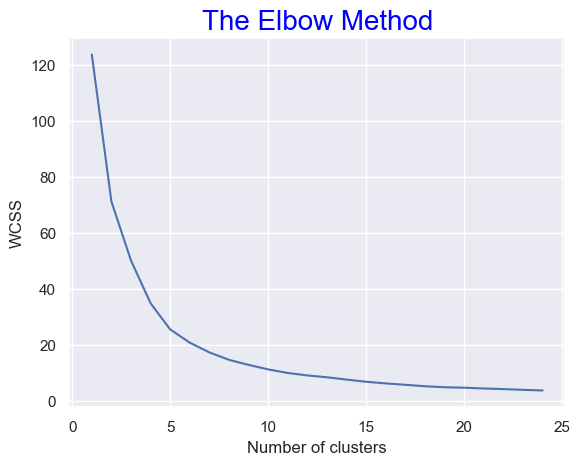

In [35]:
number_clusters = range(1,25)

plt.plot(number_clusters,wcss)

plt.title('The Elbow Method', size = 20, color = 'blue')

plt.xlabel('Number of clusters')

plt.ylabel('WCSS')

# clustering

In [9]:
kmeans = KMeans(10 ,n_init=10)
kmeans.fit(x)

KMeans(n_clusters=10, n_init=10)

In [10]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([4, 4, 3, ..., 9, 9, 8])

In [12]:
data_with_clusters = data.copy()

data_with_clusters['Cluster'] = identified_clusters

data_with_clusters

,V1,V2,Cluster
0,3.62160,8.66610,4
1,4.54590,8.16740,4
2,3.86600,-2.63830,3
3,3.45660,9.52280,4
4,0.32924,-4.45520,0
...,...,...,...
1367,0.40614,1.34920,5
1368,-1.38870,-4.87730,0
1369,-3.75030,-13.45860,9
1370,-3.56370,-8.38270,9


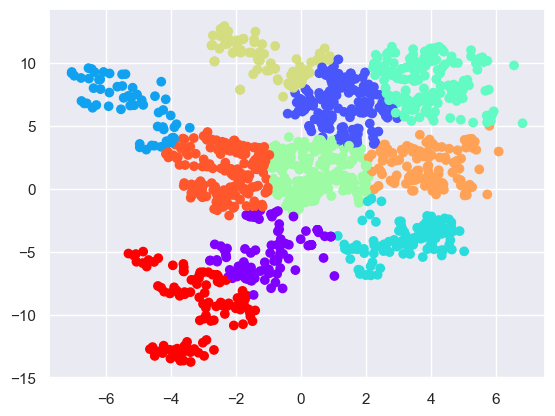

In [13]:
plt.scatter(data_with_clusters['V1'],data_with_clusters['V2'],
            c=data_with_clusters['Cluster'],cmap='rainbow')
plt.show()

## week 5 assignment

In [26]:
kmeans = KMeans(2 ,n_init=10)
kmeans.fit(x )

KMeans(n_clusters=2, n_init=10)

In [27]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, ..., 1, 1, 1])

In [28]:
data_with_clusters = data.copy()

data_with_clusters['Cluster'] = identified_clusters

data_with_clusters

,V1,V2,Cluster
0,3.62160,8.66610,0
1,4.54590,8.16740,0
2,3.86600,-2.63830,0
3,3.45660,9.52280,0
4,0.32924,-4.45520,1
...,...,...,...
1367,0.40614,1.34920,0
1368,-1.38870,-4.87730,1
1369,-3.75030,-13.45860,1
1370,-3.56370,-8.38270,1


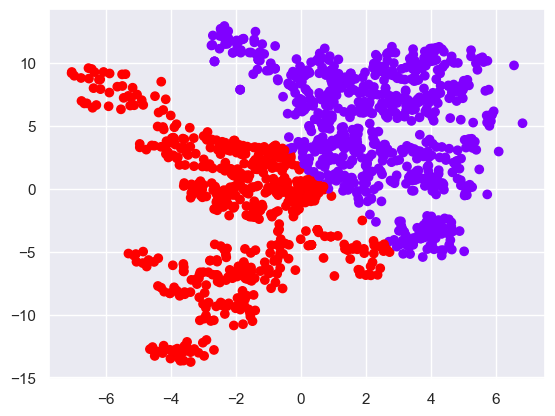

In [29]:
plt.scatter(data_with_clusters['V1'],data_with_clusters['V2'],
            c=data_with_clusters['Cluster'],cmap='rainbow')
plt.show()

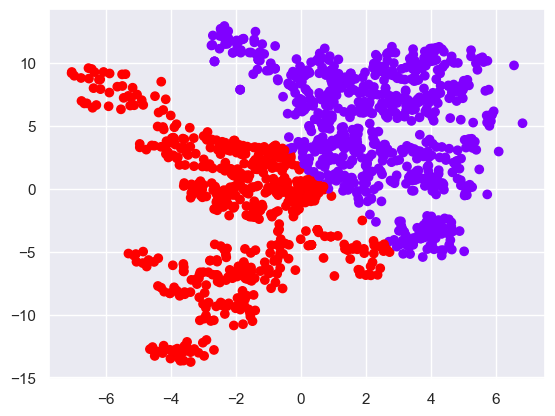

In [30]:
kmeans = KMeans(2 ,n_init=32)
kmeans.fit(x )
identified_clusters = kmeans.fit_predict(x)
identified_clusters

data_with_clusters = data.copy()

data_with_clusters['Cluster'] = identified_clusters

data_with_clusters

plt.scatter(data_with_clusters['V1'],data_with_clusters['V2'],
            c=data_with_clusters['Cluster'],cmap='rainbow')
plt.show()


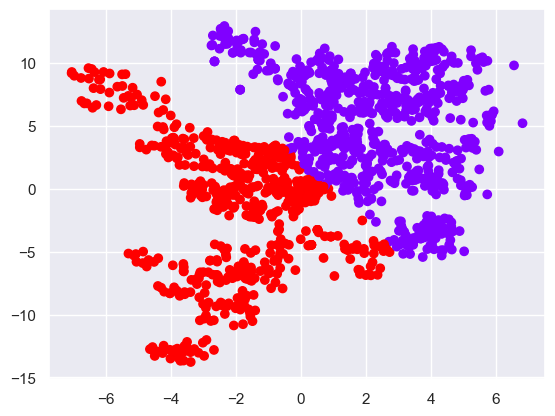

In [33]:
kmeans = KMeans(2 ,n_init=22 , random_state=5)
kmeans.fit(x )
identified_clusters = kmeans.fit_predict(x)
identified_clusters

data_with_clusters = data.copy()

data_with_clusters['Cluster'] = identified_clusters

data_with_clusters

plt.scatter(data_with_clusters['V1'],data_with_clusters['V2'],
            c=data_with_clusters['Cluster'],cmap='rainbow')
plt.show()


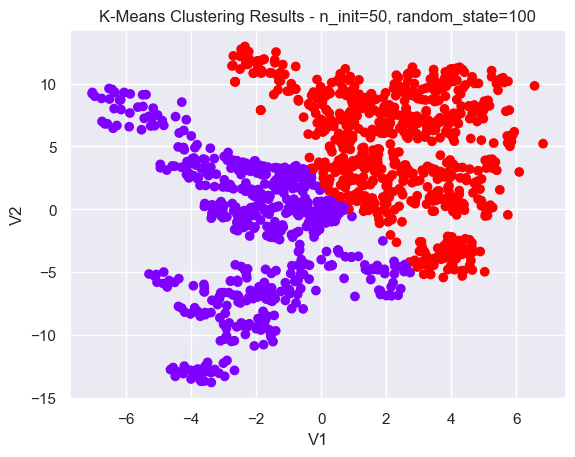

In [38]:
kmeans = KMeans(2 ,n_init=50 , random_state=100)
kmeans.fit(x )
identified_clusters = kmeans.fit_predict(x)
identified_clusters

data_with_clusters = data.copy()

data_with_clusters['Cluster'] = identified_clusters

data_with_clusters

main_label = f'n_init={50}, random_state={100}'
plt.scatter(data_with_clusters['V1'],data_with_clusters['V2'],
            c=data_with_clusters['Cluster'],cmap='rainbow')
plt.title(f'K-Means Clustering Results - {main_label}')
plt.xlabel('V1')
plt.ylabel('V2')
plt.savefig('scatter_plot.png')
plt.show()